# 군집분석
| 각 개체의 유사성을 측정하여 유사성이 높은 대상집단을 분류하는 통계적 기법 | 종속 변수가 필요하지 않기 때문에 비지도학습으로 분류


💡군집분석: 객체 간의 상이성을 규명하고 **군집의 특징을 파악**하는 것이 목적

💡요인분석: 데이터의 유사한 변수를 묶어 다중공선서을 줄이는 것이 목적

## 계층적 군집분석
| n개의 군집으로 시작해 점차 군집의 개수를 **줄여나가는** 방법

* 거리 계산법

    1. 최단 연결법: 가장 가까운 데이터를 묶어서 군집을 형성
    2. 최장 연결법: 집단 간 데이터의 최장거리를 거리로 계산
    3. 평균 연결법: 모든 데이터의 거리의 평균을 거리로 계산
    4. 중심 연결법: 군집의 중심값 간 거리를 계산
    5. 와드 연결법: 군집 내 편차들의 제곱합을 계산

<img src='./imgs/계층군집_연결법.png' width=600px height=230></img>

* Python에서는

    ```from scipy.cluster.hierarchy```의 ```linkage``` 함수를 사용하여 군집을 할당하고

    ```dendrogram``` 함수로 이를 시각화하고 군집의 개수를 설정한다.

```linkage(y, method='연결법', metric='계산법')```

* y(ndarray)
* method: 거리연결법
    
    single(최단), complete(최장), average(평균), centroid(중심), ward(와드)
* metric: 거리계산법

    euclidean(유클리디안), seuclidean(표준화), mahalanobis(마할라노비스), chebyshev(체비셰프)
    
    cityblock(맨해튼), canberra(캔버라), minkowski(민코우스키), jaccard(자카드), cosine(코사인 유사도)

### 거리계산법

1. 연속형 변수


    * 유클리디안 거리

        거리 차이의 합의 제곱근
    * 표준화 거리

        표준화 후 유클리디안 거리 계산 - 분산 차로 인한 왜곡을 피할 수 있음
    * 마할라노비스 거리

        변수들의 산포를 고려하여 표준화한 거리 - 그룹에 대한 사전 지식 없이는 사용하기 곤란함
    * 체비셰프 거리

        두 벡터의 x좌표, y좌표의 차이 중 큼 값을 갖는 거리
    * 맨하탄 거리

        맨하탄 도시에서 건물에서 건물을 가기위한 최단 거리 계산법 (계단모양)
    * 캔버라 거리

        두 벡터 사이의 차이에 대한 절대값을 두 벡터의 합으로 나눈 값
    * 민코우스키 거리

        맨하탄 거리 + 유클리디안 거리
2. 범주형 변수


    * 자카드 거리

        1- 자카드 계수 => 작을수록 두 군집이 가깝다는 의미
        * 자카드 계수: 두 집합의 교집합을 합집합으로 나눈 값
    * 자카드 유사도

        자카드 계수
    * 코사인 거리

        문서를 유사도 기준으로 분류 혹은 그룹핑 할 때 사용
    * 코사인 유사도

        두 개체의 백터 내적의 코사인 값을 이용하여 측정된 벡터간의 유사한 정도

### 계층적 군집분석 실습 - USArrests 데이터
    
* Murder: 살인 체포
* Assault: 폭행
* UrbanPop: 인구 비율
* Rape: 강간

    100,000명당 

In [1]:
import pandas as pd 
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster # 군집 할당, 시각화
import matplotlib.pyplot as plt

In [2]:
us = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/USArrests.csv')
us.rename(columns={'Unnamed: 0':'State'}, inplace=True)
us.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


 ```dendrogram(Z, orientation, labels, distance_sort, color_threshold, show_leaf_counts)```
 
 
 * Z(ndarray): linkage 완료한 데이터
 * orientation: 뻗어나가는 방향 ('top', 'bottom', 'left', 'right')
 * labels: x축 표시 값(list)
 * distance_sort: 노드의 하위링크가 표시되는 순서('descending' 가장 먼 노드가 왼쪽에 위치)
 * color_threshold: 클러스터 노드 아래의 하위 링크에 색상 지정 (클러스터를 나눌 height값 지정, t 값 기준)
 * show_leaf_counts: 

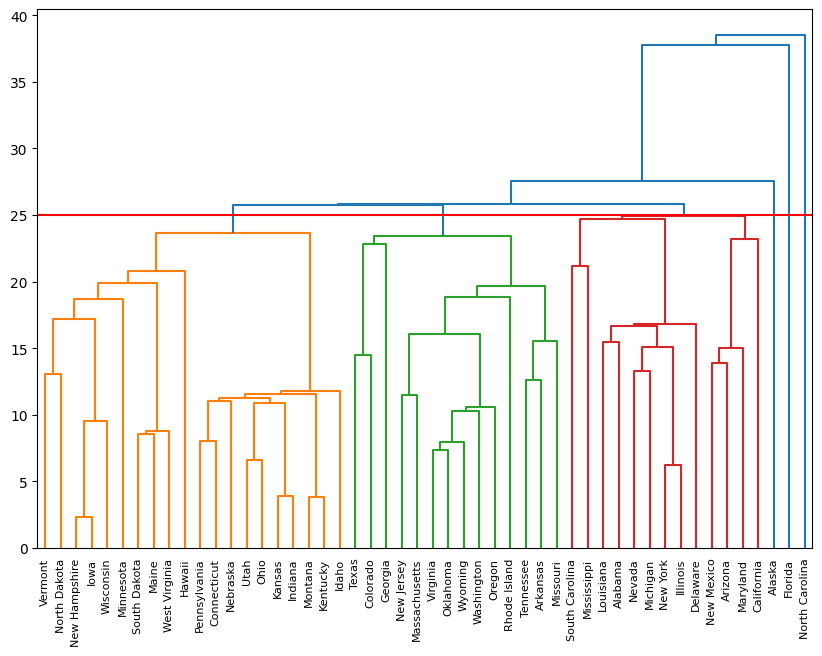

In [3]:
# 최단 연결법(single)
single = linkage(us.iloc[:, 1::], metric='euclidean', method='single')
# State컬럼은 고유값으로 제외, 유클리디안 거리로 최단 연결법 시행
label = us.State.tolist()
plt.figure(figsize=(10, 7)) # 판 짜기
dendrogram(single, orientation='top', labels=label, distance_sort='descending', color_threshold=25, show_leaf_counts=True)
plt.axhline(y=25, color='r'); 


* t값의 기준을 25로 군집활르 시켰을 때 6개의 군집이 생김을 예상할 수 있다.
* 최단 연결법은 군집이 가지고 있는 객체의 수가 비슷하지 않아 군집 해석이 어려울 수 있다.

    이를 보완하기 위해 와드 연결법을 사용한다.

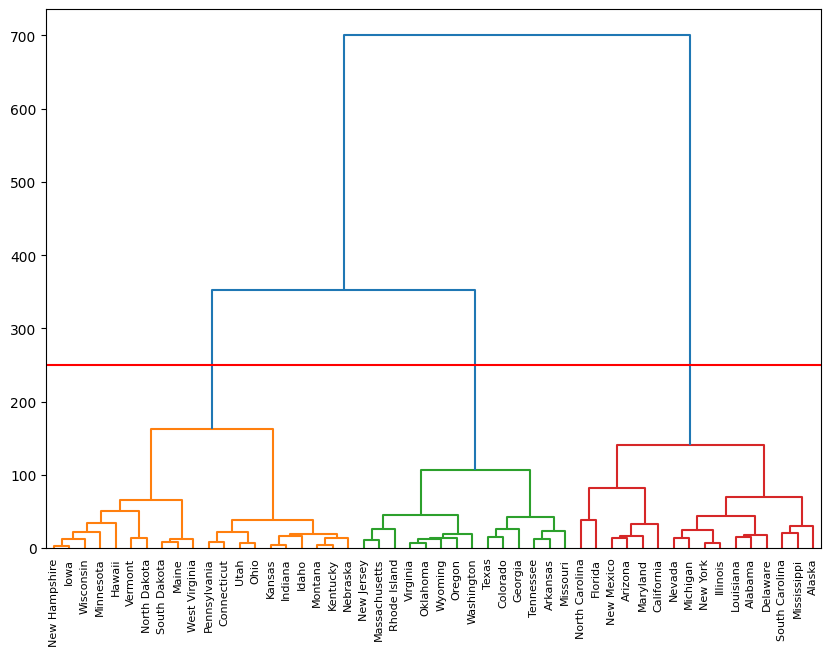

In [4]:
# 와드연결법(ward)
ward = linkage(us.iloc[:, 1::], metric='euclidean', method='ward')
# 덴드로그램
plt.figure(figsize=(10,7))
dendrogram(ward, orientation='top', labels=label, distance_sort='descending', color_threshold=250, show_leaf_counts=True)
plt.axhline(y=250, color='r');

* t값을 250으로 놓았을 때 3개의 군집으로 적절히 나누어지는 것을 알수 있으며 각 군집의 개체 수가 비슷하다
* 와드연결법은 분석가가 덴드로그램을 통해 군집을 해석하기 쉽다는 장점이 있다

```fcluster(Z, t, criterion, depth, R, monocrit)```

* 

In [5]:
# 할당된 군집 라벨링 fcluster()
assignment = fcluster(ward, 250, 'distance') # criterion='distance': 거리 기준
assignment

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [6]:
# cluster 컬럼 생성
us['cluster'] = assignment
US = us.drop('State', axis=1)
US.groupby('cluster').mean() # 그룹 별 평균 확인

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


## 비계층적 군집분석
| 비계층적 군집분석은 순차적이 아닌 랜덤하게 군집을 묶어가는 알고리즘이 사용됨
* K-means - 원형으로 군집화된 데이터에 적합
* DBSCAN - 밀도기반 클러스터링 방법으로 반달형태의 데이터에 적합
* 혼합분포 - 대부분 정규분포의 형태를 지니는 실생활 데이터분석에 적합

    
  등등

### K-means
|속성의 개수가 적은 단순한 데이터에 많이 활용되는 알고리즘
1. 군집 개수인 k값을 미리 설정한다
2. 각 데이터로부터 각 클러스터들의 중심점까지의 거리를 계산해 분류한다
3. 배당을 마친 클러스터에서 중심값을 재설정한다

2,3번 과정을 반복하다 알고리즘의 중심 변화가 작아지면 반복을 중지한다.

* K값의 판단법
1. 콜린스키 하라바츠 스코어

    모든 클러스터에 대한 클러스터 간 분산과 클러스터 내 분산합의 비율

    점수가 높을수록 성능이 좋다

2. 엘보우 메소드

    반복문을 통해 k를 늘려가면서 SSE값을 비교한다

    SSE가 급격히 줄어드는 부분을 elbow로 판단하고 최적 클러스터 개수를 결정한다.

#### K-means 예제

In [7]:
# K_means 예제
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import seaborn as sns

In [8]:
# 데이터 로드
iris = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/iris.csv')
X = iris.drop('target', axis=1)
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
## 콜린스키 하라바츠 스코어 - 높을 수록👍
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans.labels_ # 배당된 클러스터
    print(f'''
          k:{k}
          score: {calinski_harabasz_score(X, labels)}''')
    


          k:2
          score: 513.3038433517568

          k:3
          score: 560.3999242466402

          k:4
          score: 529.1207190840455

          k:5
          score: 494.0943819140986

          k:6
          score: 474.51742958716295

          k:7
          score: 448.8714494416451

          k:8
          score: 436.61302488142496

          k:9
          score: 414.5303174051382


* k=3

k: 1 SSE: 680.8244000000001
k: 2 SSE: 152.36870647733903
k: 3 SSE: 78.94084142614602
k: 4 SSE: 57.34540931571816
k: 5 SSE: 46.535582051282056
k: 6 SSE: 38.95701115711986
k: 7 SSE: 34.326529914529914
k: 8 SSE: 30.227724598930486
k: 9 SSE: 27.766706937799043
k: 10 SSE: 26.07225182334006


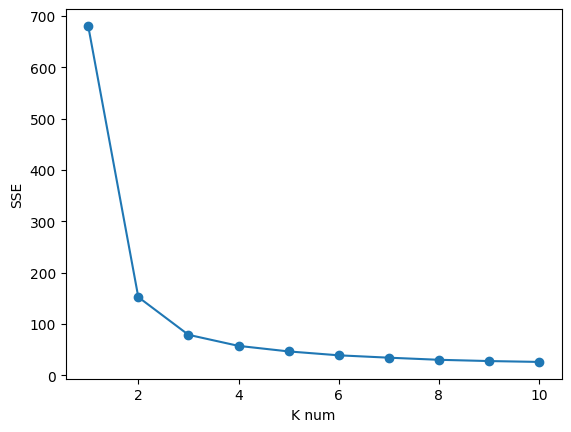

In [10]:
# 엘보우 메소드
def elbow(X):
    sse = []
    for k in range(1, 11):
        km = KMeans(n_clusters=k, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
        print(f'k: {k} SSE: {km.inertia_}')
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('K num')
    plt.ylabel('SSE');
elbow(X)

* ```KMeans.inertia_```: 군집 내 데이터들과 중심간 거리의 합으로 군집의 응집도를 나타내며, 값이 작을수록 군집화가 잘 되었다고 평가할 수 있다

In [23]:
# 최적 k(3)dmfh KMeans 군집화 실행
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)
label = km.labels_
X['cluster'] = label
X.groupby('cluster').mean()

,sepal length,sepal width,petal length,petal width
cluster,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


<Figure size 500x600 with 0 Axes>

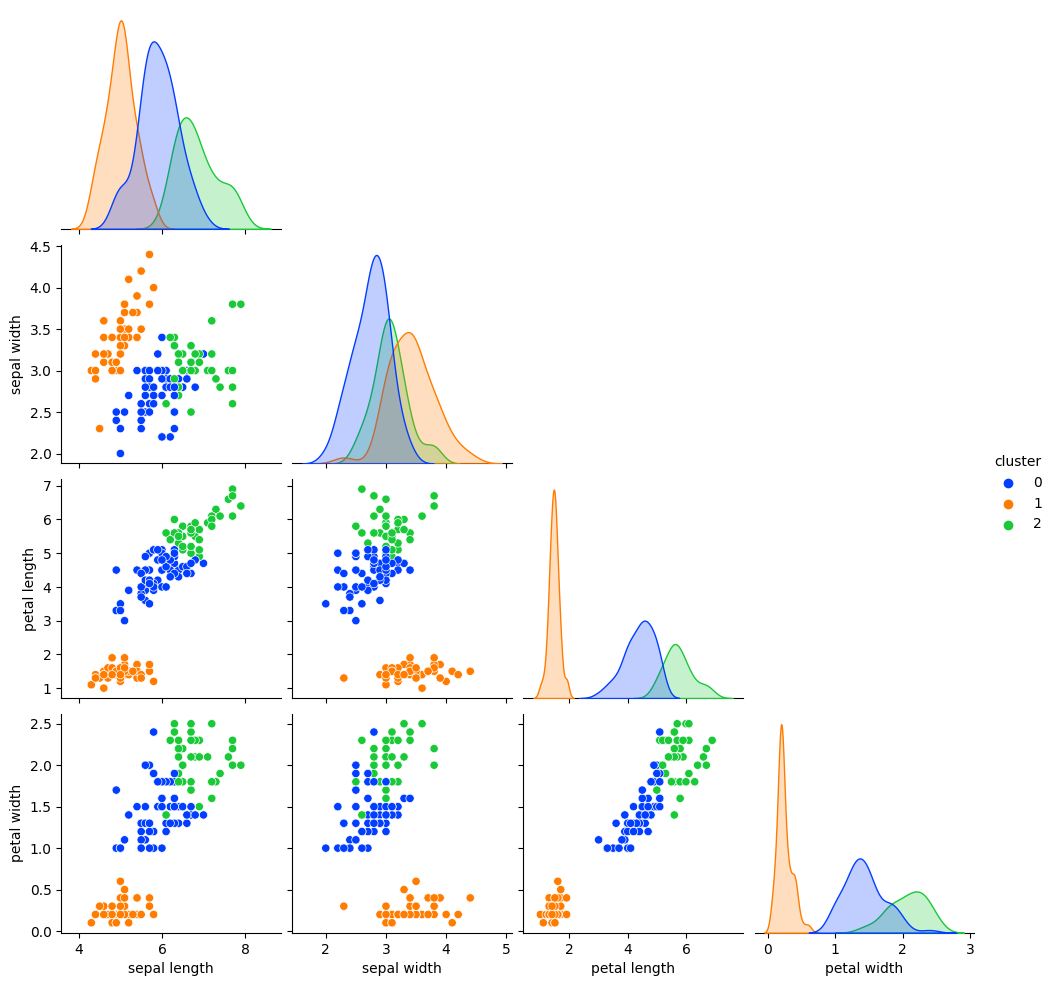

In [27]:
# KMeans 군집결과 시각화
plt.figure(figsize=(5,6))
sns.pairplot(
    X,
    diag_kind='kde', # {‘auto’, ‘hist’, ‘kde’, None} 대각 원소에 표시할 plot
    hue='cluster',
    corner=True, # 코너부분만 표시(중복되니까!)
    palette='bright'
);

## 혼합분포 군집분석
| 모형을 기반으로 한 군집분석
| 데이터가 k개의 모수적 모형의 가중합으로 표현되는 모집단 모형으로부터 나왔다는 가정 하에 군집분석 진행
* 실생활의 데이터를 적용시키기 위해 발전된 모델
* 정규분포에서 멀어질 수록, 이상치가 많을수록 결과가 좋지 못함


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [34]:
# 표준화
scaler = StandardScaler()
x = X.drop('cluster', axis=1)
x_scaled = scaler.fit_transform(x)
# 가우시안 혼합모델 구축
gmm = GaussianMixture(n_components=3) # 예상 군집 수 설정
gmm.fit(x_scaled)
gmm_labels = gmm.predict(x_scaled)
gmm_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
x['cluster'] = gmm_labels
x.groupby('cluster').mean()

,sepal length,sepal width,petal length,petal width
cluster,,,,
0,6.554545,2.950909,5.489091,1.989091
1,5.006000,3.418000,1.464000,0.244000
2,5.904444,2.775556,4.193333,1.293333


<Figure size 500x600 with 0 Axes>

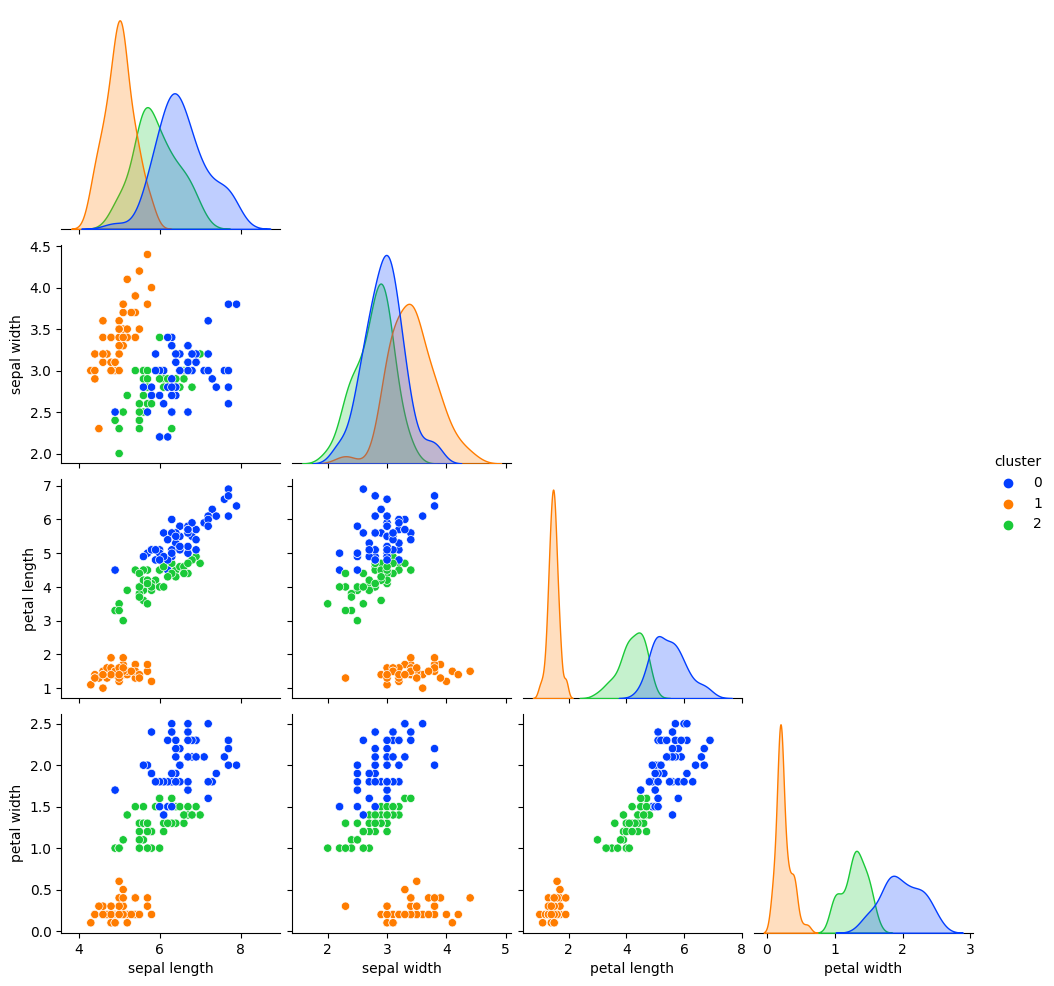

In [37]:
# 군집결과 시각화
plt.figure(figsize=(5,6))
sns.pairplot(
    x,
    diag_kind='kde',
    hue='cluster',
    palette='bright',
    corner=True
);

* KMeans 알고리즘은 원형, GMM은 타원 형태의 데이터를 잘 군집화 시키는 것을 볼 수 있다

    꽃의 종류는 (sepal length, sepal width) 보다는 (petal width, petal length) 로 구별된다고 할 수 있다